# Bibliotecas

In [ ]:
from obterDados import obterSimboloPosicao, obterSimboloData
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import tensorflow as tf
import gymnasium as gym
import gym_anytrading
from stable_baselines3 import A2C

In [ ]:
rawDataM5 = obterSimboloPosicao()
rawDataM5

In [ ]:
rawDataM5.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'real_volume': 'Volume'
}, inplace=True)
rawDataM5

In [ ]:
rawDataD1 = obterSimboloData(rawDataM5.index[-1], n=int(len(rawDataM5)/108)+200)
rawDataD1

In [ ]:
rawDataD1.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'real_volume': 'Volume'
}, inplace=True)
rawDataD1

In [167]:
windowSize = 108*20
trainEnd = len(rawDataM5.to_numpy()) - 50 * 108
dataLength = len(rawDataM5)

In [ ]:
from customTradingEnv import CustomTradingEnv

env = CustomTradingEnv(
    df_5min=rawDataM5,
    df_daily=rawDataD1,
    initial_balance=10000,
    take_profit=30,
    stop_loss=10,
    observation_window_5min=300,
    observation_window_daily=200
)

In [ ]:
# env = gym.make('stocks-v0', df=rawDataM5, frame_bound=(windowSize, trainEnd), window_size=windowSize)

In [ ]:
observation, info = env.reset(seed=2023)
done = False
while not done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()

print("info:", info)
plt.cla()
env.unwrapped.render_all()
plt.show()

In [ ]:
from stable_baselines3.common.envs import DummyVecEnv

env = DummyVecEnv([lambda: env])
modelo = A2C('MlpPolicy', env, verbose=1, tensorboard_log='logs/a2c/')

In [ ]:
modelo.learn(total_timesteps=dataLength*2)

In [ ]:
# env = CustomTradingEnv(
#     df_5min=rawDataM5,
#     df_daily=rawDataD1,
#     initial_balance=10000,
#     take_profit=30,
#     stop_loss=10,
#     observation_window_5min=300,
#     observation_window_daily=200
# )

In [168]:
# env = gym.make('stocks-v0', df=rawDataM5, frame_bound=(trainEnd-windowSize, dataLength), window_size=windowSize)

info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}


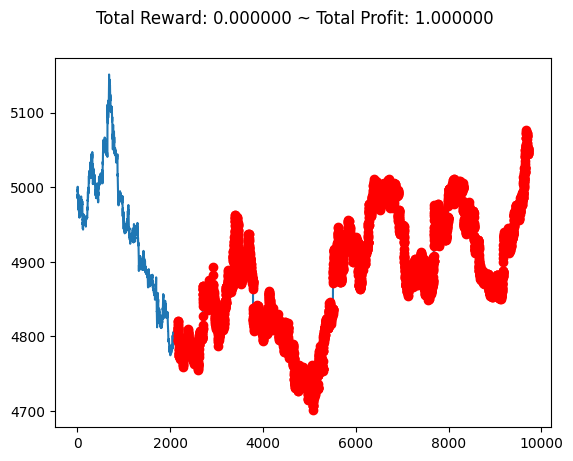

In [169]:
observation, info = env.reset()
done = False
while not done:
    action = modelo.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()

print("info:", info)
plt.cla()
env.unwrapped.render_all()
plt.show()